# Lineární regrese HDP


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.stattools import durbin_watson


## Načtení dat


In [2]:
df = pd.read_excel(
    r"C:\Users\Zdeněk Beránek\Desktop\phytonsoubory\Predikce-HDP\Regrese_data (1).xlsx"
)

df.head(), df.columns


(    Rok       Hdp  Zahraniční obchod  Průmysl  Nezaměstnanost  Inflace  Mzda
 0  2001  2.917240           9.426906     11.3             8.1      4.7   3.9
 1  2002  1.513443           0.896110     -0.4             7.3      1.8   6.1
 2  2003  3.300836           8.841053      3.3             7.8      0.1   5.7
 3  2004  4.736346          29.732160     15.6             8.3      2.8   3.4
 4  2005  6.375039          18.349075      6.2             7.9      1.9   3.0,
 Index(['Rok', 'Hdp', 'Zahraniční obchod', 'Průmysl', 'Nezaměstnanost',
        'Inflace', 'Mzda'],
       dtype='object'))

## Definice proměnných


In [3]:
y = df["Hdp"]

X = df[
    ["Zahraniční obchod",
     "Průmysl",
     "Nezaměstnanost",
     "Inflace",
     "Mzda"]
]


## Standardizace proměnných


In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled = sm.add_constant(X_scaled)


## Lineární regresní model (OLS)


In [5]:
model_main = sm.OLS(y, X_scaled).fit()
model_main.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Hdp   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     9.544
Date:                Fri, 16 Jan 2026   Prob (F-statistic):           0.000178
Time:                        13:32:18   Log-Likelihood:                -42.275
No. Observations:                  23   AIC:                             96.55
Df Residuals:                      17   BIC:                             103.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.4094      0.369      6.533      0.000       1.631       3.188
Zahraniční obchod     1.6297      0.815      2.000      0.062      -0.090       3.349
Průmysl               1.0227      0.762      1.343      0.197      -0.584       2.630
Nezaměstnanost       -0.6890      0.516     -1.336      0.199      -1.777       0.399
Inflace               0.1779      0.687      0.259      0.799      -1.272       1.628
Mzda                  1.0878      0.615      1.768      0.095      -0.210       2.386
==============================================================================
Omnibus:                        2.988   Durbin-Watson:                   2.385
Prob(Omnibus):                  0.225   Jarque-Bera (JB):                1.519
Skew:                          -0.579   Prob(JB):                        0.468
Kurtosis:                       3.495   Cond. No.                         4.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Diagnostika reziduí


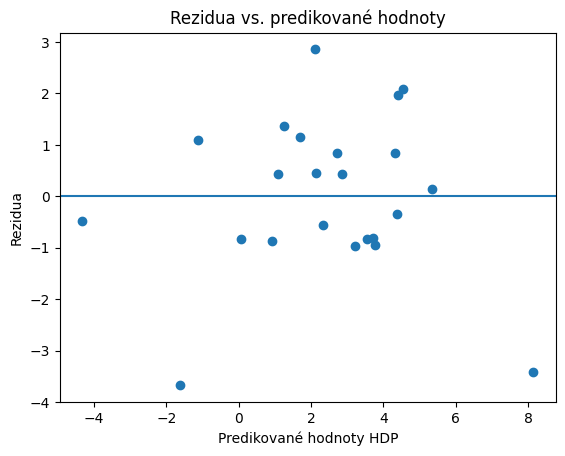

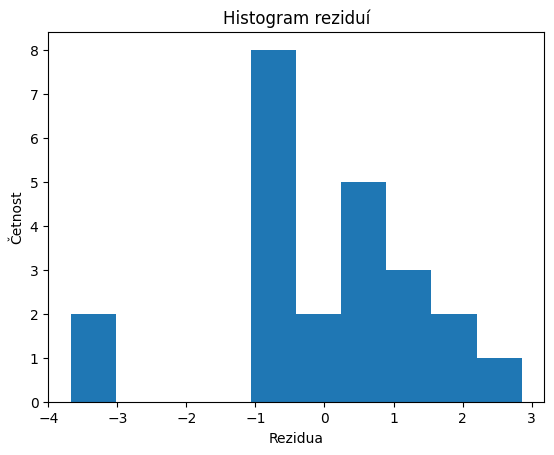

np.float64(2.3846131902107457)

In [6]:
residuals = model_main.resid
fitted = model_main.fittedvalues

plt.figure()
plt.scatter(fitted, residuals)
plt.axhline(0)
plt.xlabel("Predikované hodnoty HDP")
plt.ylabel("Rezidua")
plt.title("Rezidua vs. predikované hodnoty")
plt.show()

plt.figure()
plt.hist(residuals, bins=10)
plt.xlabel("Rezidua")
plt.ylabel("Četnost")
plt.title("Histogram reziduí")
plt.show()

durbin_watson(residuals)


## Časová regrese s trendem


In [7]:
df["trend"] = range(len(df))

X_ts = df[
    ["Zahraniční obchod",
     "Průmysl",
     "Nezaměstnanost",
     "Inflace",
     "Mzda",
     "trend"]
]

scaler_ts = StandardScaler()
X_ts_scaled = scaler_ts.fit_transform(X_ts)

X_ts_scaled = pd.DataFrame(X_ts_scaled, columns=X_ts.columns)
X_ts_scaled = sm.add_constant(X_ts_scaled)

model_ts = sm.OLS(y, X_ts_scaled).fit()
model_ts.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Hdp   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     8.575
Date:                Fri, 16 Jan 2026   Prob (F-statistic):           0.000281
Time:                        13:32:19   Log-Likelihood:                -41.102
No. Observations:                  23   AIC:                             96.20
Df Residuals:                      16   BIC:                             104.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.4094      0.361      6.670      0.000       1.644       3.175
Zahraniční obchod     1.7780      0.806      2.206      0.042       0.069       3.487
Průmysl               1.0415      0.746      1.396      0.182      -0.541       2.624
Nezaměstnanost       -2.6777      1.599     -1.674      0.113      -6.068       0.712
Inflace              -0.9467      1.091     -0.868      0.398      -3.259       1.365
Mzda                 -0.2680      1.197     -0.224      0.826      -2.806       2.270
trend                -1.9812      1.512     -1.311      0.208      -5.186       1.223
==============================================================================
Omnibus:                        4.760   Durbin-Watson:                   2.409
Prob(Omnibus):                  0.093   Jarque-Bera (JB):                2.759
Skew:                          -0.640   Prob(JB):                        0.252
Kurtosis:                       4.115   Cond. No.                         12.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Predikce HDP


In [11]:
future_data = pd.DataFrame({
    "Zahraniční obchod": [5.0],
    "Průmysl": [3.0],
    "Nezaměstnanost": [4.2],
    "Inflace": [2.8],
    "Mzda": [4.2]
})

future_data_scaled = scaler.transform(future_data)
future_data_scaled = pd.DataFrame(
    future_data_scaled,
    columns=future_data.columns
)


future_data_scaled = sm.add_constant(
    future_data_scaled,
    has_constant="add"
)

predicted_hdp = model_main.predict(future_data_scaled)



## Výsledek


In [12]:
print("Predikované HDP:", round(predicted_hdp.iloc[0], 2))


Predikované HDP: 2.83
